In [1680]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [1681]:
df = pd.read_csv('cleaned_diabetes_data.csv')

In [1682]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,176.68,33.6,0.627,50,1
1,1,85.0,66.0,29,51.29,26.6,0.351,31,0
2,8,183.0,64.0,20,257.20,23.3,0.672,32,1
3,1,89.0,66.0,23,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35,168.00,43.1,1.200,33,1


In [1683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [1684]:
df.duplicated().sum()

0

In [1685]:
df[df['BloodPressure']<40].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [1686]:
# d =df[df['Insulin']==0]
# k= d[d['Outcome']==0]
# ind =k.index[k['Glucose']>=125].tolist()
# for i in ind :
#     df.loc[i, 'Outcome'] = 1
# df=df.drop(columns='Insulin',axis=1)

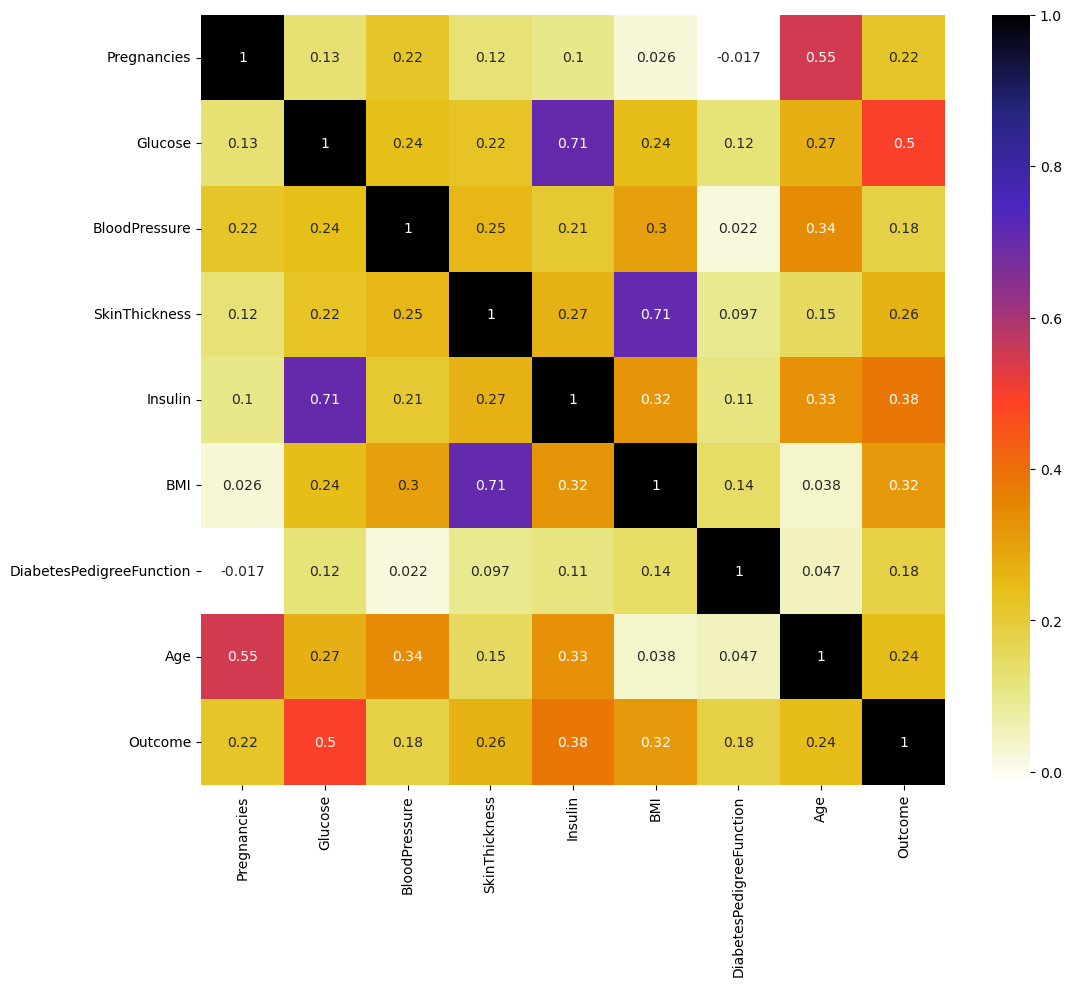

In [1687]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

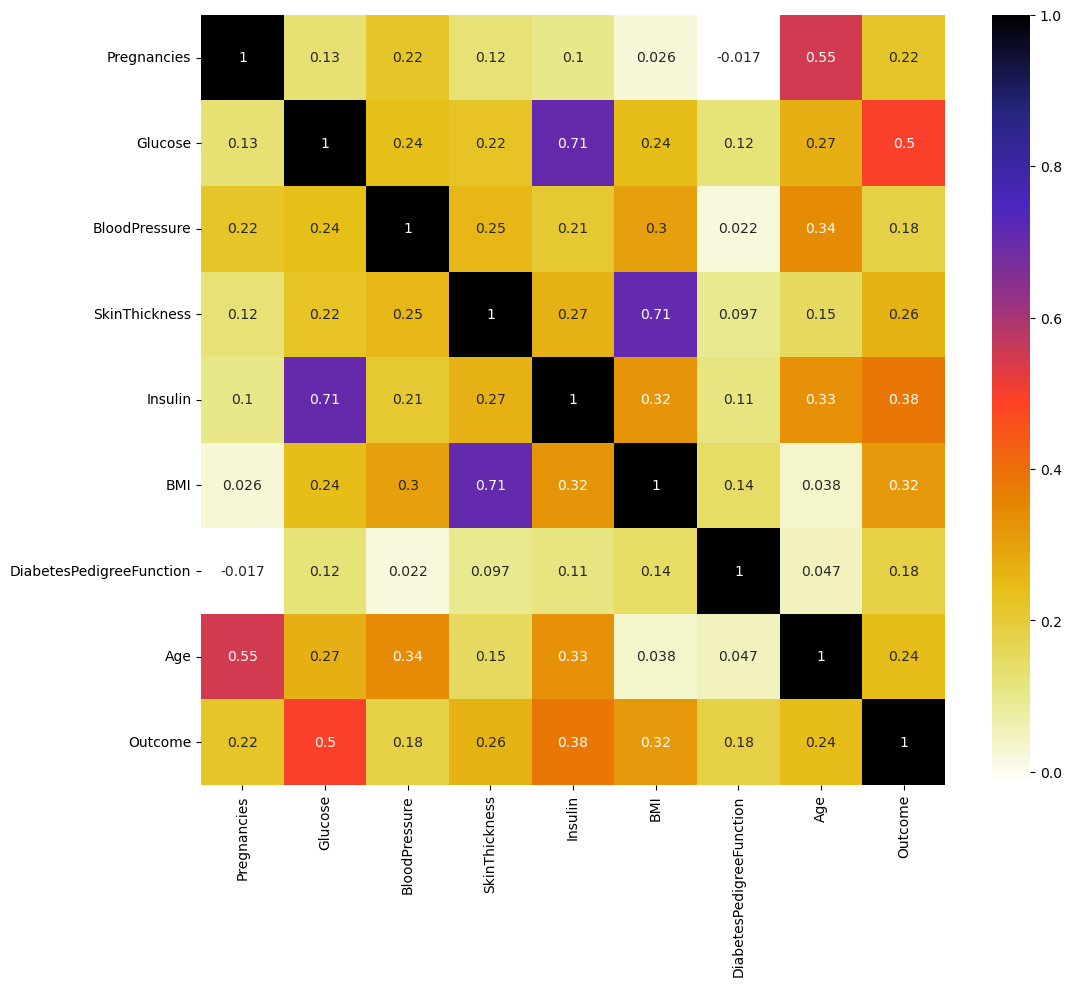

In [1688]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [1689]:
cols=['Glucose','BloodPressure','Insulin','BMI','SkinThickness','DiabetesPedigreeFunction','Age','Pregnancies','Outcome',]

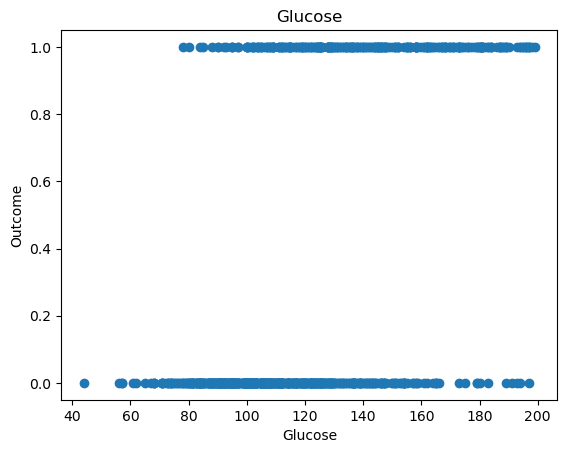

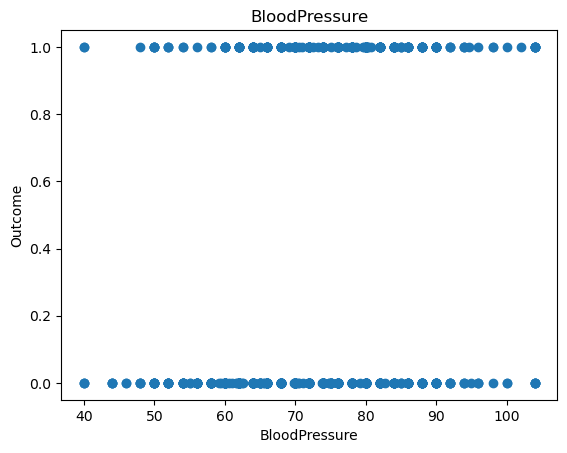

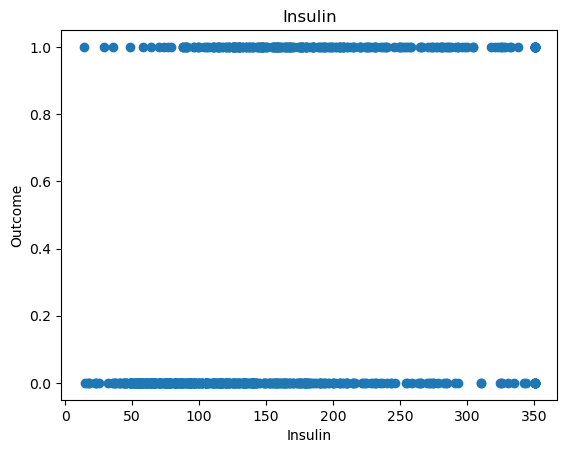

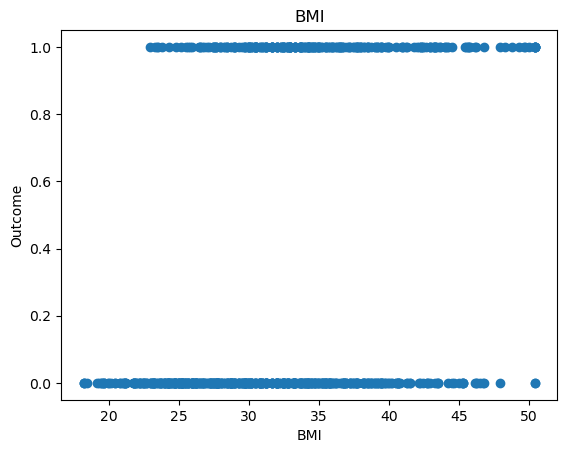

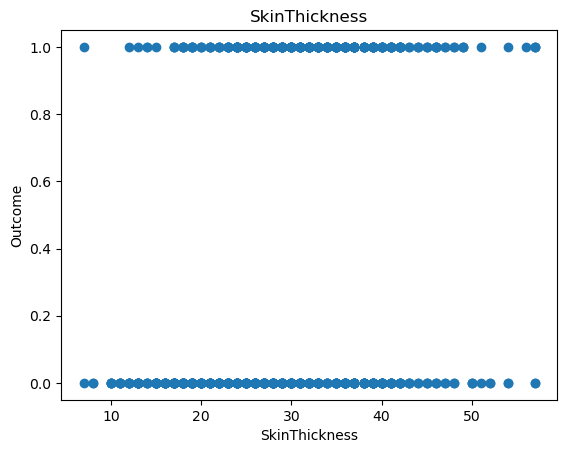

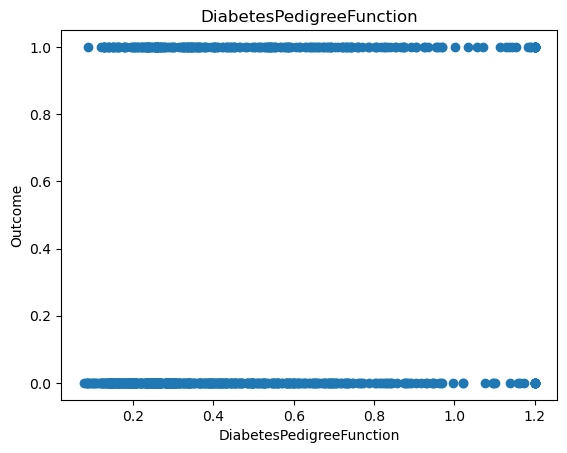

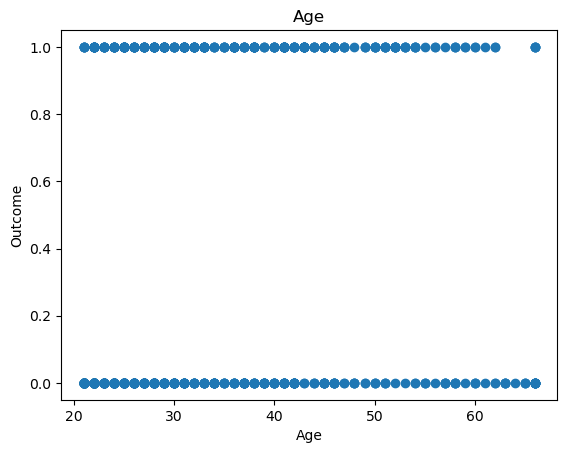

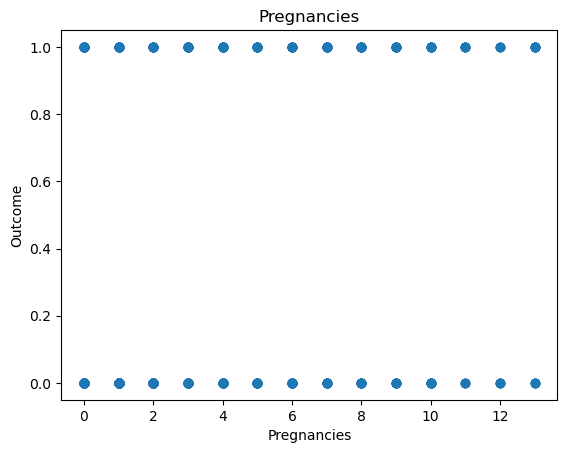

In [1690]:
for label in cols[:-1]:
    plt.scatter(df[label],df['Outcome'])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

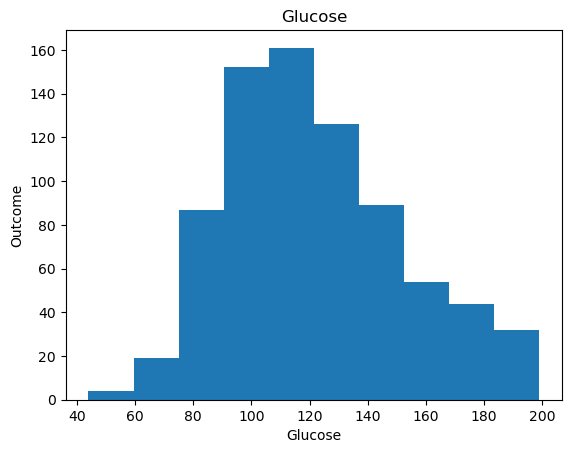

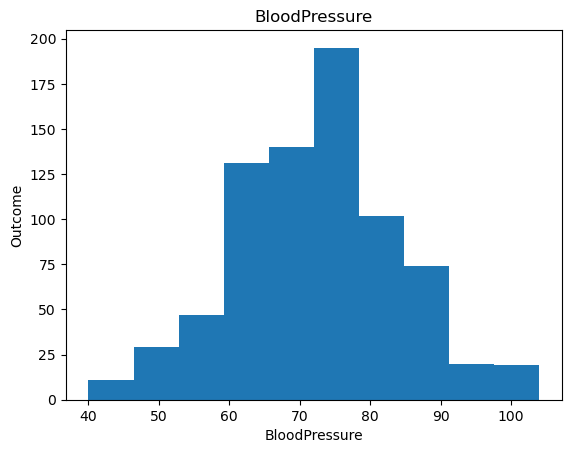

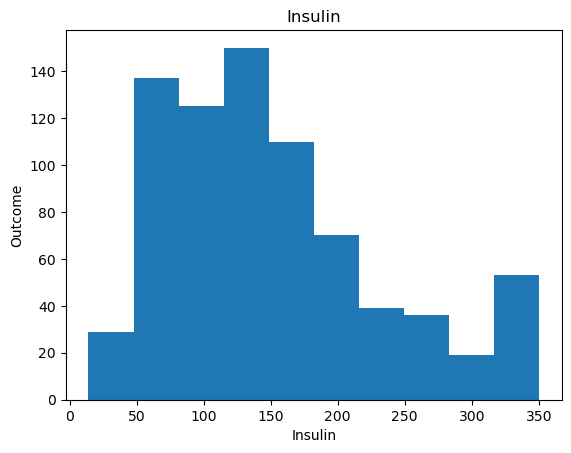

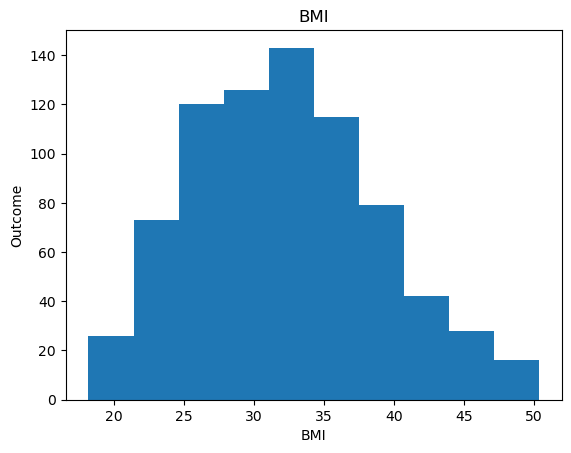

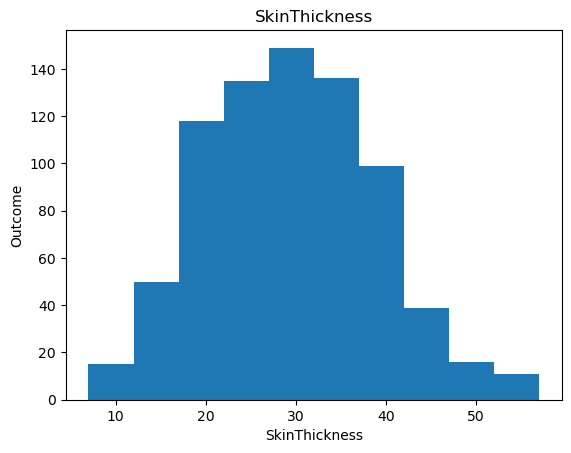

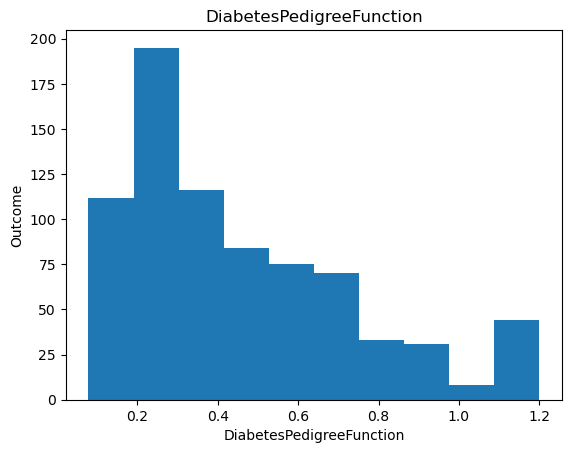

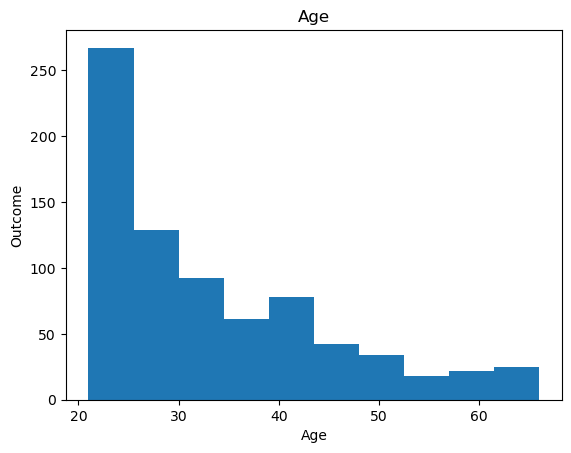

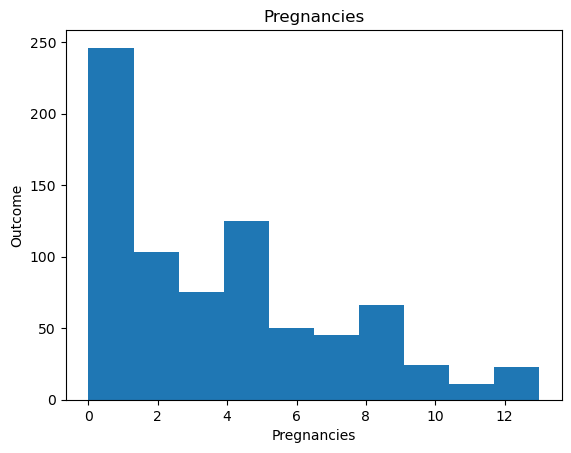

In [1691]:
for label in cols[:-1]:
    plt.hist(df[label])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

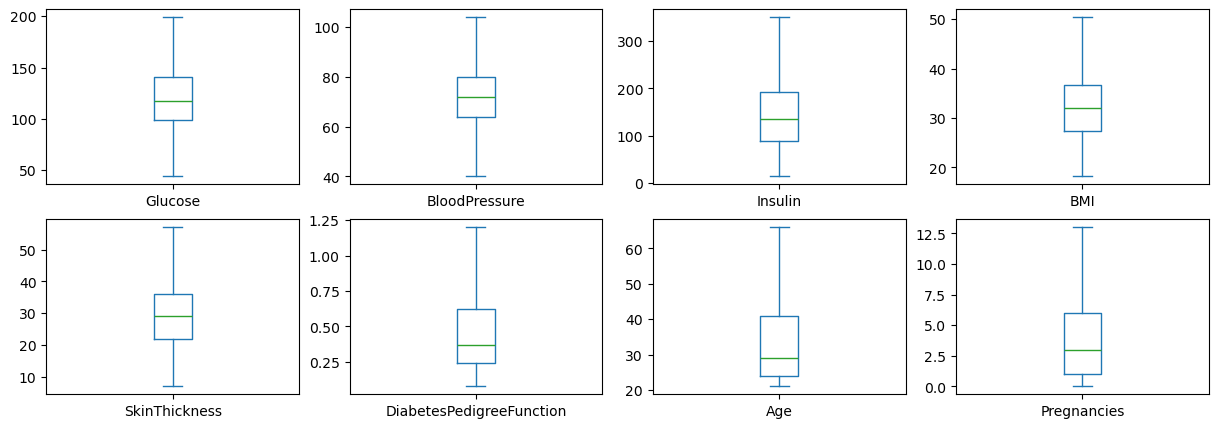

In [1692]:
for i in range(1,9):
    plt.subplot(2, 4, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [1693]:
def clean_outlier_re(col,outlier,df,value ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        for j in ind :
            df.loc[j, col] = value
    return df

In [1694]:
def clean_outlier_drop(col,outlier,df ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df=df.drop(index=ind,axis=0)
    return df

In [1695]:
def find_outlier(cols,data):#outlier 
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers_list = data[(data[cols] < lower_bound) | (data[cols] > upper_bound)][cols].unique().tolist()
    return outliers_list,lower_bound,upper_bound


In [1696]:
for i in cols[:-1]:
    outlier,l,u = find_outlier(i,df)
    print(i," :",outlier)  

Glucose  : []
BloodPressure  : []
Insulin  : []
BMI  : []
SkinThickness  : []
DiabetesPedigreeFunction  : []
Age  : []
Pregnancies  : []


In [1697]:
df.shape

(768, 9)

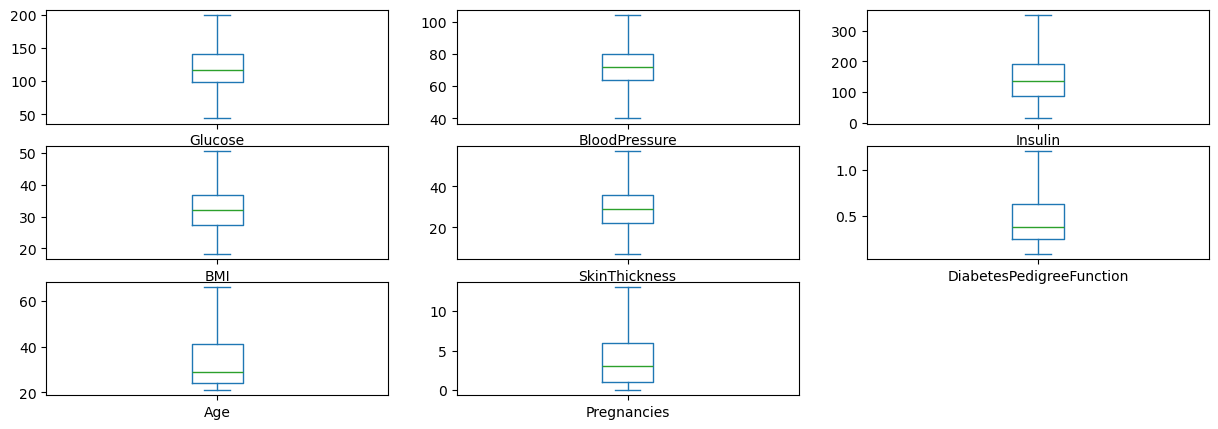

In [1698]:
for i in range(1,9):
    plt.subplot(3, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [1699]:
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title('Histogram of '+feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title('Probability Plot of '+feature)
    plt.show()


In [1700]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,176.68,33.6,0.627,50,1
1,1,85.0,66.0,29,51.29,26.6,0.351,31,0
2,8,183.0,64.0,20,257.20,23.3,0.672,32,1
3,1,89.0,66.0,23,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35,168.00,43.1,1.200,33,1


In [1701]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [1702]:
def scale(df,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    if oversample:
        
        # ros = TomekLinks()
        # ros =RandomUnderSampler()
        # ros = ADASYN()
        # ros=SMOTE()
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
        ros=SMOTEENN()
        x, y = ros.fit_resample(x,y)
    #data = np.hstack([x,np.reshape(y,(-1,1))])
    return x, y

In [1703]:
data = df.copy()

In [1704]:
reduced_features = ['BloodPressure', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness']  # Keep these
df = df.drop(columns=reduced_features, axis=1)

In [1705]:
df.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148.0,33.6,50,1
1,1,85.0,26.6,31,0
2,8,183.0,23.3,32,1
3,1,89.0,28.1,21,0
4,0,137.0,43.1,33,1


In [1706]:
train,test = train_test_split(df,test_size=0.20)
dtrain,dtest = train_test_split(data,test_size=0.15)

In [1707]:
train['Outcome'].value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_6692\4024586266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=pd.DataFrame(train['Outcome']), palette = 'pastel')


<Axes: xlabel='Outcome', ylabel='count'>

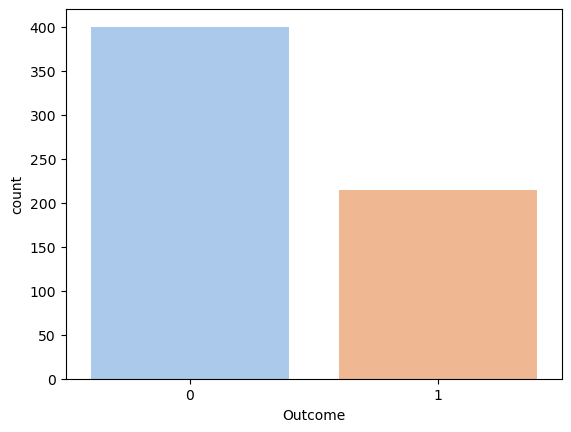

In [1708]:
sns.countplot(x='Outcome', data=pd.DataFrame(train['Outcome']), palette = 'pastel')

In [1709]:
xtrain,ytrain = scale(dtrain,True)
xtest,ytest = scale(dtest,False)

In [1710]:
x_train,y_train = scale(train,True)
x_test,y_test = scale(test,False)

# Deep learning

In [1711]:
def plot_history(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [1712]:
dl_model = Sequential() 
dl_model.add(Dense(256,  activation = 'relu' ,input_shape=([8]))) #input layer
dl_model.add(Dense(256,  activation = 'relu'))
dl_model.add(Dense(1,activation = 'sigmoid'))
dl_model.summary()
dl_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy','Precision','Recall','AUC'])

c:\Users\ASUS TUF\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,353 (267.00 KB)

 Trainable params: 68,353 (267.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1713]:
# num_epochs = 100
# history = dl_model.fit(xtrain,
#                     ytrain,
#                     epochs=num_epochs,
#                     steps_per_epoch=200,
#                     validation_data=(xtest, ytest),
#                     verbose=0)

In [1714]:
dl_model.evaluate(xtest,ytest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.3307 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7133 - loss: 0.6810  


[0.6818654537200928, 0.7155172228813171, 0.0, 0.0, 0.3066812753677368]

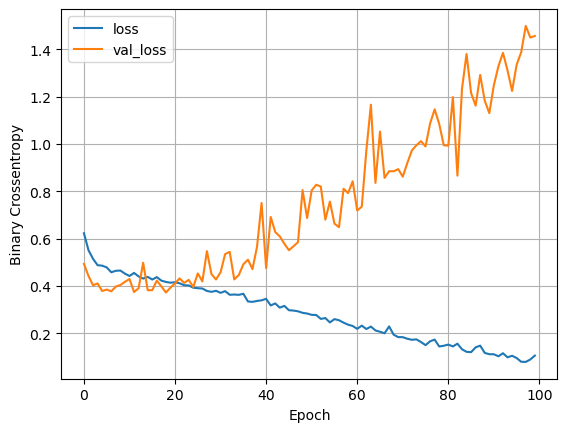

In [1715]:
plot_history(history)

# Build Model

In [1716]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
GB.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [1717]:
y_pre = GB.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       100
           1       0.63      0.69      0.65        54

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



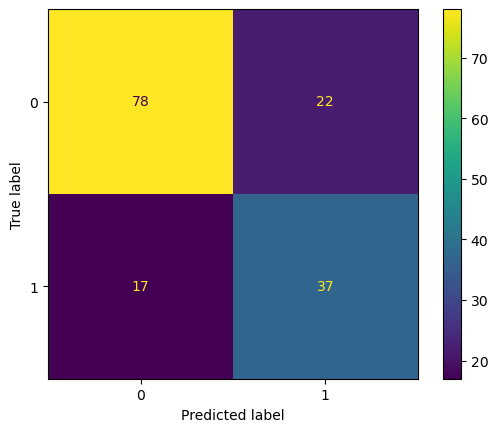

In [1718]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [1719]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],   # Step size
    'max_depth': [3, 4, 5],              # Maximum depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples in a leaf
    'subsample': [0.8, 1.0],             # Fraction of samples used for fitting
}


In [1720]:
# Instantiate the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='accuracy',   # Metric to optimize
    cv=5,                 # 5-fold cross-validation
    verbose=2,            # Show progress
    n_jobs=-1             # Use all available processors
)

# Fit the model
# grid_search.fit(x_train, y_train)
# print("Best Parameters:", grid_search.best_params_)


In [1721]:
# y_pre = grid_search.predict(x_test)
# print(classification_report(y_test,y_pre))

In [1722]:
# confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

# cm_display.plot()
# plt.show()

In [1723]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [1724]:
y_pre = lg_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       100
           1       0.59      0.69      0.63        54

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



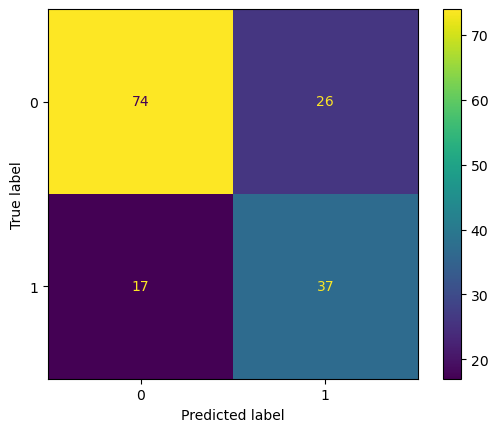

In [1725]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [1726]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [1727]:
y_pre = svm_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.67      0.76      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



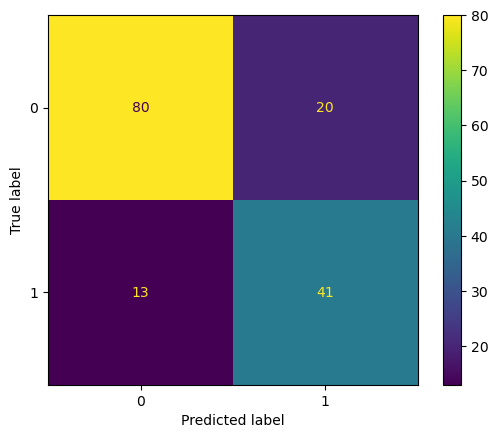

In [1728]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [1729]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [1730]:
y_pre = nb_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       100
           1       0.59      0.76      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.73       154



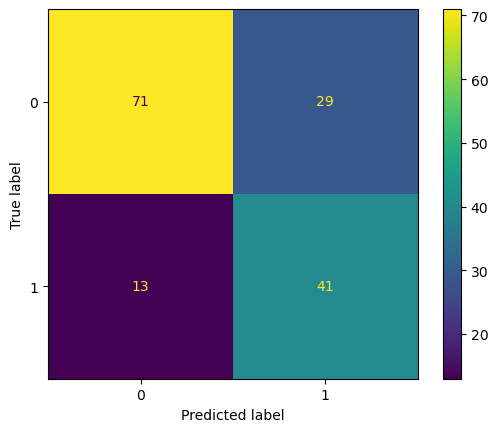

In [1731]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### **Tuning for GaussianNB**

In [1732]:
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # The regularization term (for smoothing the variance)
    
}

nb_model = GaussianNB()
grid_search = GridSearchCV(estimator = nb_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
# Fit the model
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'var_smoothing': 1e-09}

In [1733]:
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       100
           1       0.59      0.76      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.73       154



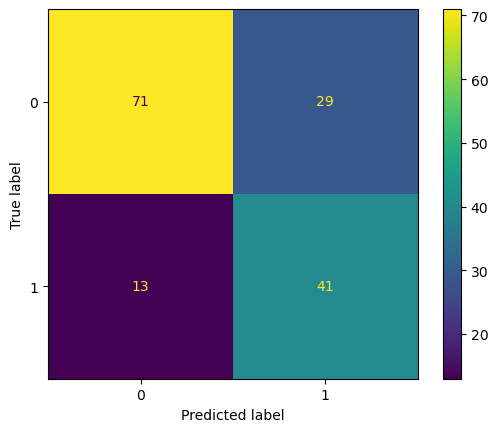

In [1734]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [1735]:
rf_model = RandomForestClassifier(criterion='gini',
                                  max_depth=8,
                                  min_samples_split=10)
rf_model.fit(x_train, y_train)
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       100
           1       0.59      0.76      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.73       154



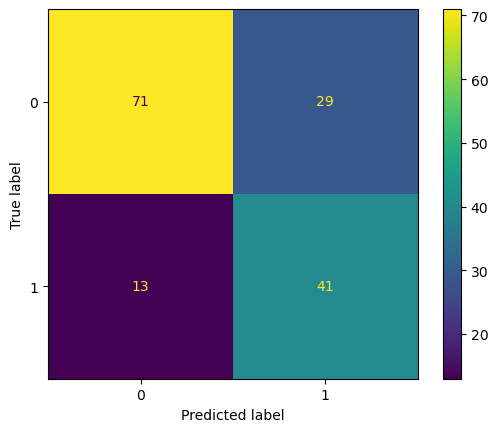

In [1736]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# **Random Forest + Turning**

In [1737]:

parameters = {
    'n_estimators': [10, 50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],             # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],     # Number of features to consider at each split
    'bootstrap': [True, False]              # Whether to use bootstrap sampling or not
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(x_train, y_train)
grid_search.best_params_


{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [1738]:
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))
# print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       100
           1       0.67      0.70      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



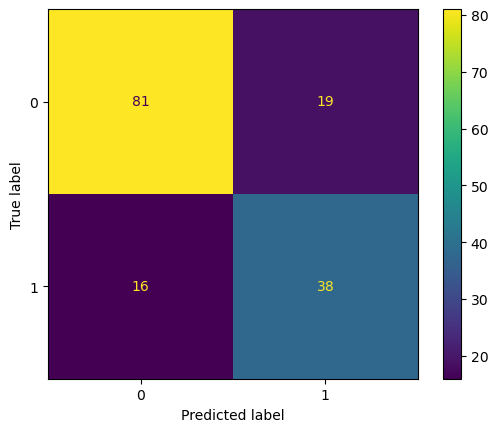

In [1739]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()